In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:/Users/Toshiba/Desktop/Magistr 1/2 kisamyak/ML/Assignments/Assignment3/Telco-Customer-Churn.csv')

In [3]:
#For X dropping 'customerID' which is  unnecessary feature and 'Churn which is our Y'
X = df.drop(['Churn','customerID'], axis=1) 
X = pd.get_dummies(X,drop_first=True) #getting dummies

In [4]:
y = df['Churn']

In [5]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.25, random_state=42)


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [92]:
knn = KNeighborsClassifier()

In [93]:
k_values = list(range(1,40))
param_grid = {'n_neighbors': k_values}

full_cv_classifier = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [94]:
full_cv_classifier.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'uniform'}

In [95]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

In [96]:
model = KNeighborsClassifier(n_neighbors=19, n_jobs=-1)
model.fit(X_train,y_train)

preds = model.predict(X_test)
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

          No       0.81      0.92      0.86      1300
         Yes       0.64      0.39      0.48       458

    accuracy                           0.78      1758
   macro avg       0.72      0.66      0.67      1758
weighted avg       0.77      0.78      0.76      1758



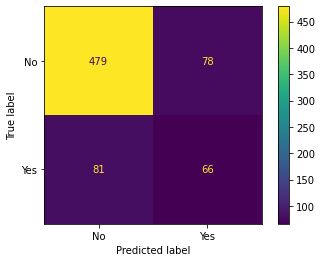

In [73]:
print(plot_confusion_matrix(model,X_test,y_test))